### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

###############################################################################################################

img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

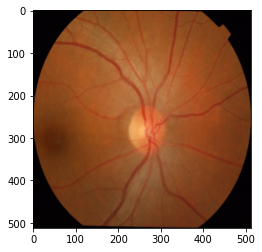

(50, 512, 512, 3)


(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

In [3]:
plt.imshow(img_train[45])
plt.show()
print(img_train.shape)
img_train, cup_train, disc_train, disc_locations

### Train images

In [4]:
lab_b_channel_train = convert_to_lab(2, img_train)
len(lab_b_channel_train)

50

### Test images

In [5]:
lab_b_channel_test = convert_to_lab(2, img_test)
len(lab_b_channel_test)

51

#### Generator of augmented data:

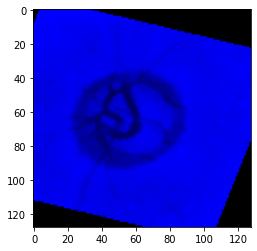

In [6]:
gen = data_generator(lab_b_channel_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

plt.imshow(batch[0][0])

51
51


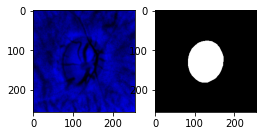

In [7]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(lab_b_channel_test, cup_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))
print(len(X_test)) 
print(len(Y_test))

#-----------------------
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and test cup

In [8]:
epochs = NUM_EPOCHS
spe = SPE

model = create_compile_model(img_size)
history_cup = train(lab_b_channel_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_lab_b', 
                    model, 
                    epochs, X_test, Y_test, img_size, spe)

3/3 [==============================] - 14s 5s/step - loss: 1.3405 - mean_IOU_gpu: 0.0709 - dice_metric: 0.1323 - val_loss: 1.4626 - val_mean_IOU_gpu: 0.0807 - val_dice_metric: 0.1489


### Visual check

image #0


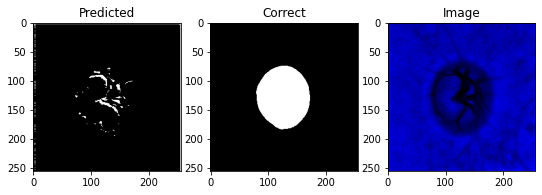

IOU: 0.0690184012055397
Dice: 0.1291248206599713
image #1


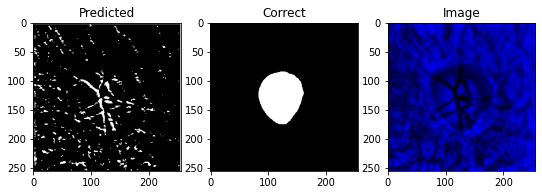

IOU: 0.09841068089008331
Dice: 0.1791874059497627
image #2


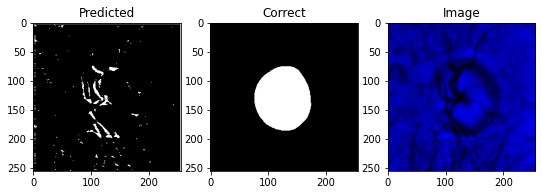

IOU: 0.0777260959148407
Dice: 0.14424091301428982
image #3


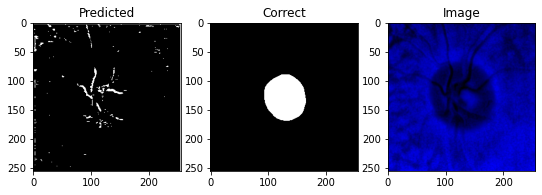

IOU: 0.06665494292974472
Dice: 0.12497938994229184
image #4


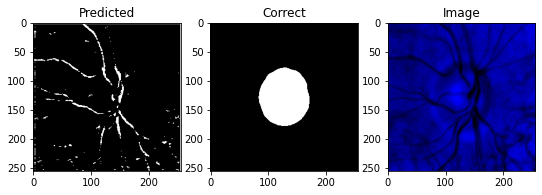

IOU: 0.06681974977254868
Dice: 0.12526904864399482
image #5


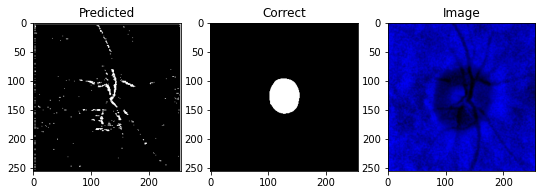

IOU: 0.07908881455659866
Dice: 0.14658444022770398
image #6


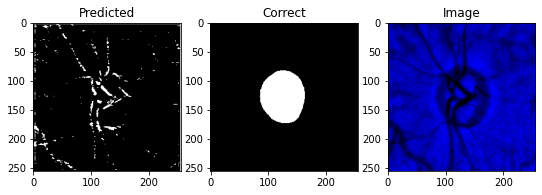

IOU: 0.08805297315120697
Dice: 0.16185420173507703
image #7


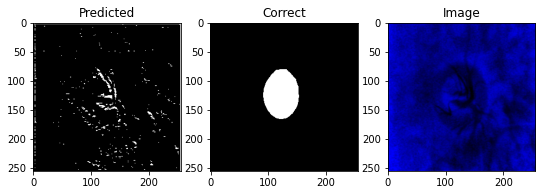

IOU: 0.07898160070180893
Dice: 0.1464002755769893
image #8


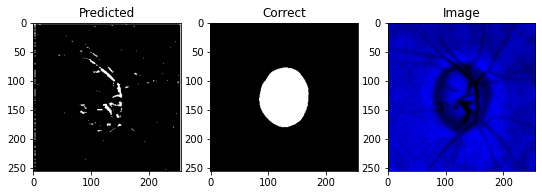

IOU: 0.07674328237771988
Dice: 0.14254703328509408
image #9


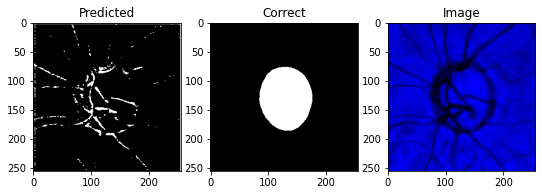

IOU: 0.09054326266050339
Dice: 0.16605166051660517
image #10


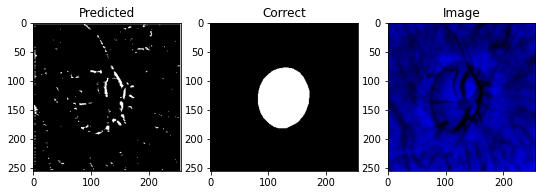

IOU: 0.06962911039590836
Dice: 0.13019299967288192
image #11


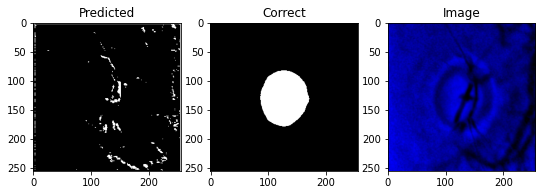

IOU: 0.041344668716192245
Dice: 0.07940630797773655
image #12


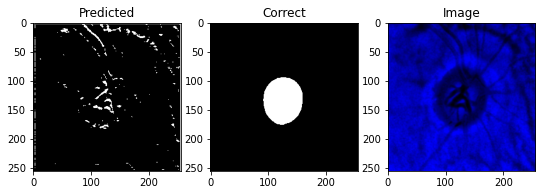

IOU: 0.06244823709130287
Dice: 0.11755534767695666
image #13


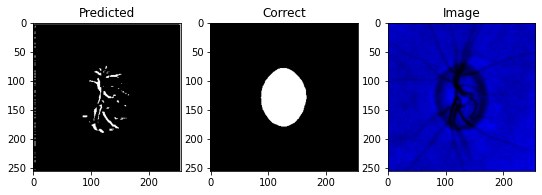

IOU: 0.08853939175605774
Dice: 0.16267558528428094
image #14


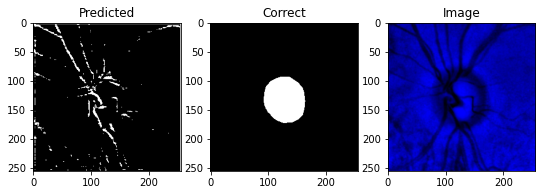

IOU: 0.0822470486164093
Dice: 0.15199311729280185
image #15


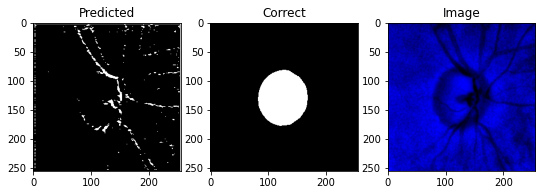

IOU: 0.0585152842104435
Dice: 0.11056105610561057
image #16


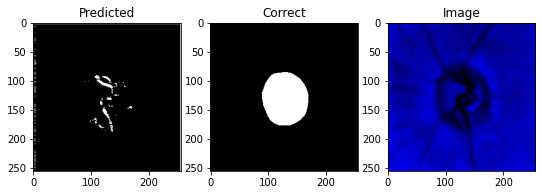

IOU: 0.07027929276227951
Dice: 0.13132888951921715
image #17


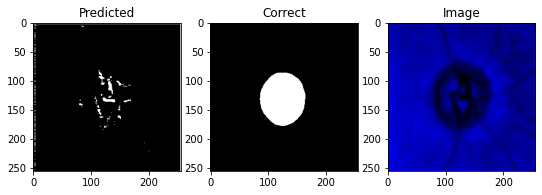

IOU: 0.07780572026968002
Dice: 0.14437800787516405
image #18


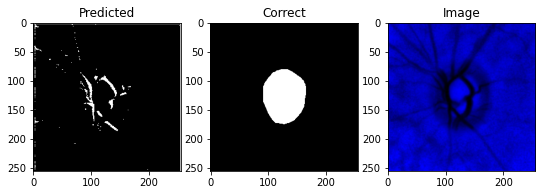

IOU: 0.10837515443563461
Dice: 0.1955568133578605
image #19


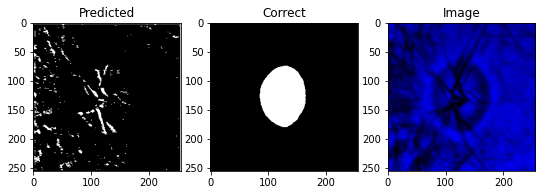

IOU: 0.07631141692399979
Dice: 0.14180174219869887
image #20


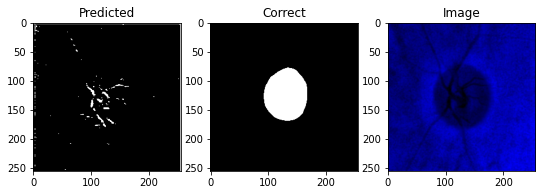

IOU: 0.06013689562678337
Dice: 0.11345119139123751
image #21


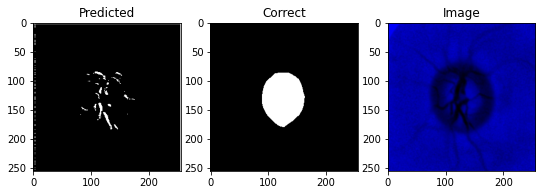

IOU: 0.07179916650056839
Dice: 0.1339787632729544
image #22


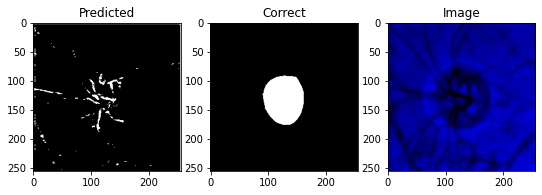

IOU: 0.11368788033723831
Dice: 0.20416470956630656
image #23


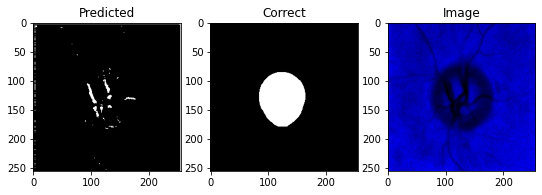

IOU: 0.0687221959233284
Dice: 0.12860628678053682
image #24


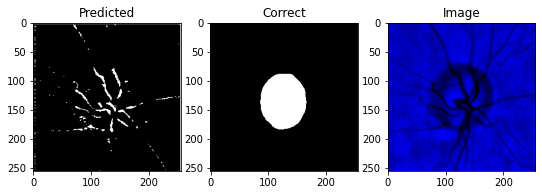

IOU: 0.09620391577482224
Dice: 0.17552194024253032
image #25


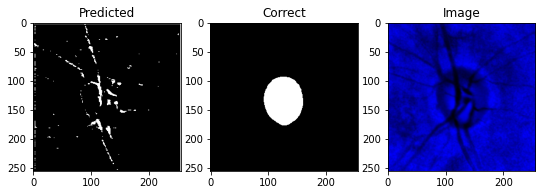

IOU: 0.08520956337451935
Dice: 0.15703798276412384
image #26


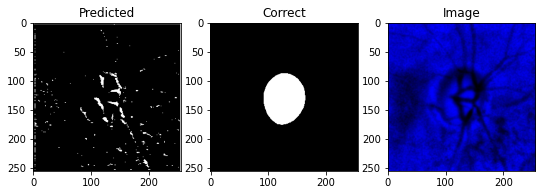

IOU: 0.09152433276176453
Dice: 0.1677000295246531
image #27


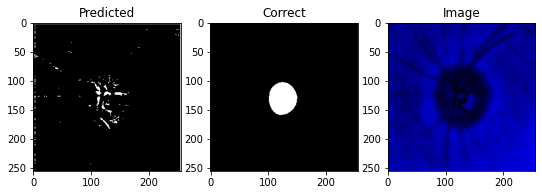

IOU: 0.104448102414608
Dice: 0.18914081145584727
image #28


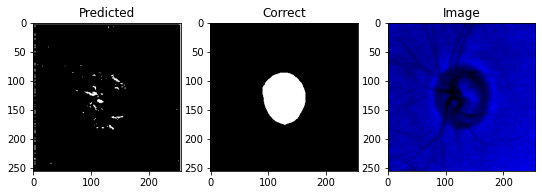

IOU: 0.05271317809820175
Dice: 0.10014727540500737
image #29


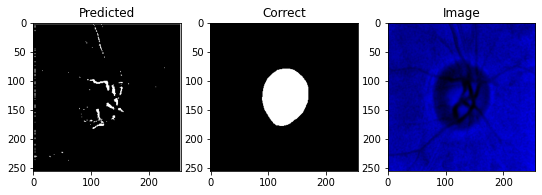

IOU: 0.0847606509923935
Dice: 0.1562753036437247
image #30


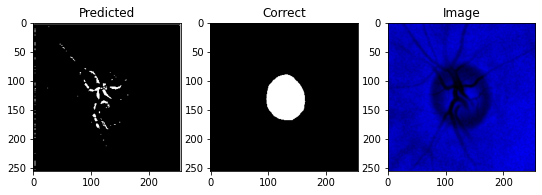

IOU: 0.08216959983110428
Dice: 0.1518608565550776
image #31


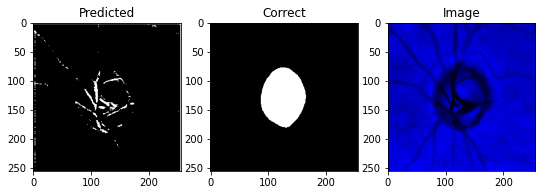

IOU: 0.11135244369506836
Dice: 0.20039087947882736
image #32


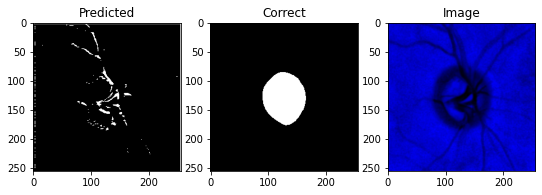

IOU: 0.08809055387973785
Dice: 0.16191768430574402
image #33


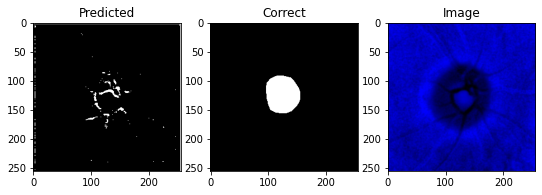

IOU: 0.0869455635547638
Dice: 0.15998145142592163
image #34


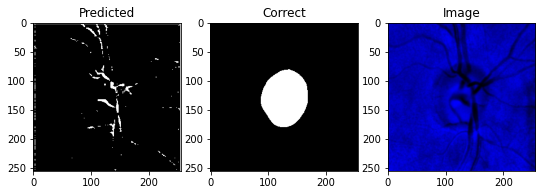

IOU: 0.0775320753455162
Dice: 0.1439067646313656
image #35


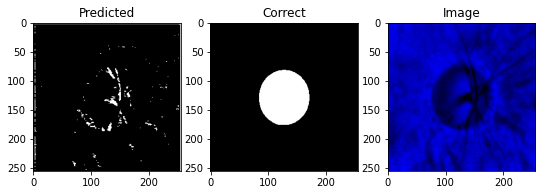

IOU: 0.05557011812925339
Dice: 0.10528929724360567
image #36


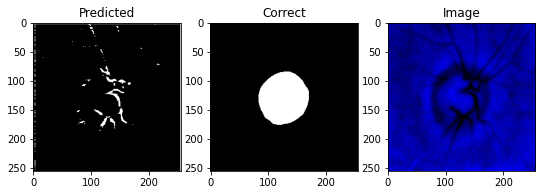

IOU: 0.0855281800031662
Dice: 0.15757891990607878
image #37


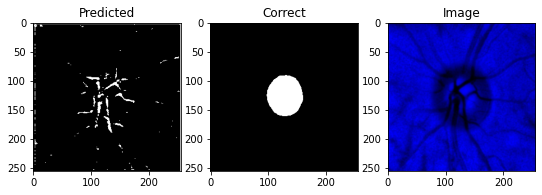

IOU: 0.11053874343633652
Dice: 0.1990722844994202
image #38


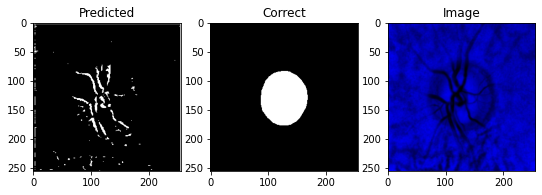

IOU: 0.09750782698392868
Dice: 0.17768953964511727
image #39


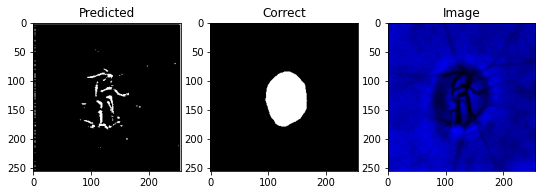

IOU: 0.1113666221499443
Dice: 0.20041383387525866
image #40


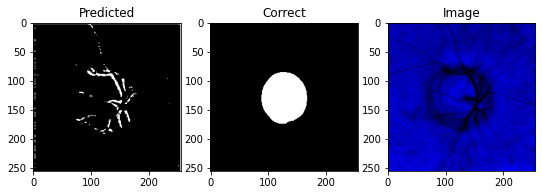

IOU: 0.08517446368932724
Dice: 0.15697837686043245
image #41


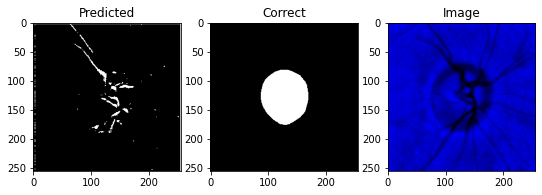

IOU: 0.08229747414588928
Dice: 0.15207920792079208
image #42


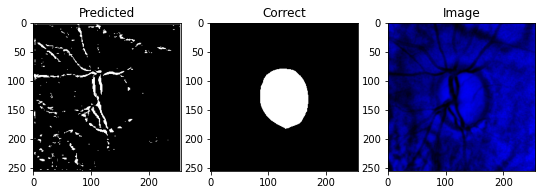

IOU: 0.08845985680818558
Dice: 0.16254133680729532
image #43


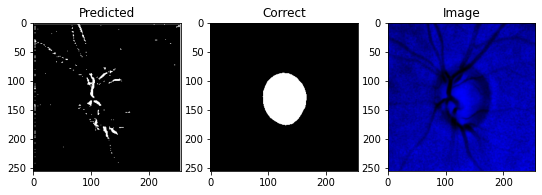

IOU: 0.05995650961995125
Dice: 0.11313012895662368
image #44


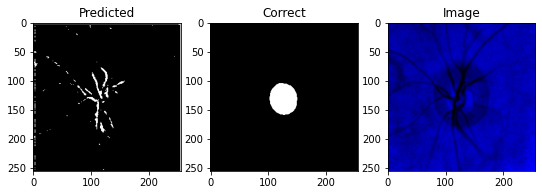

IOU: 0.08590441942214966
Dice: 0.15821727019498608
image #45


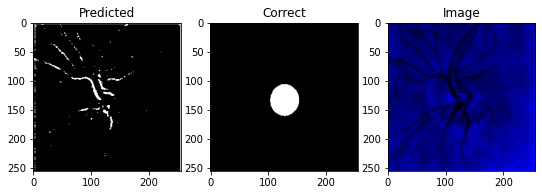

IOU: 0.07981491833925247
Dice: 0.14783074450990893
image #46


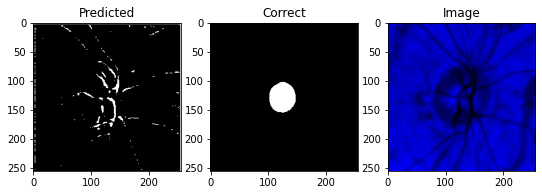

IOU: 0.07185450196266174
Dice: 0.13407510431154382
image #47


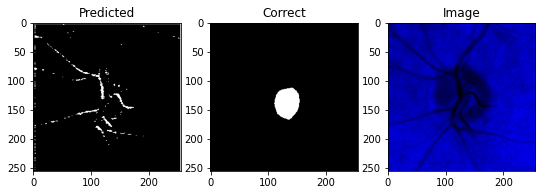

IOU: 0.04922197386622429
Dice: 0.09382566585956416
image #48


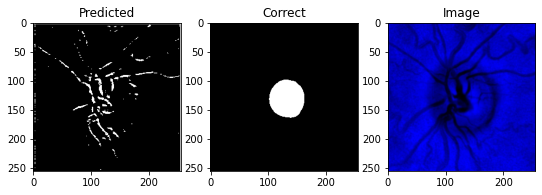

IOU: 0.08260781317949295
Dice: 0.15260893959229474
image #49


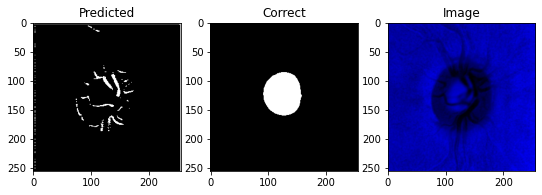

IOU: 0.09701492637395859
Dice: 0.17687074829931973
image #50


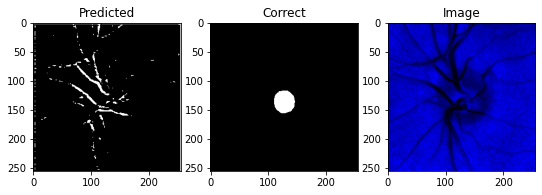

IOU: 0.05764583870768547
Dice: 0.10900783289817233


In [9]:
pred_iou, pred_dice, pred_cup = predict(lab_b_channel_test, X_test, Y_test, model, img_size)

In [10]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.08045677
0.1484898082026914


### Training and Test disc

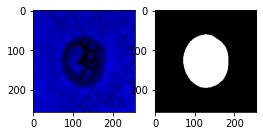

In [11]:
X_test, Z_test = next(data_generator(lab_b_channel_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

num = 1
for i in range(num):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()
    print('=========================')

In [12]:
history_disc = train(lab_b_channel_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_lab_b', 
                     model, epochs, X_test, Z_test, img_size, spe)

3/3 [==============================] - 9s 4s/step - loss: 1.0951 - mean_IOU_gpu: 0.0930 - dice_metric: 0.1699 - val_loss: 1.0048 - val_mean_IOU_gpu: 0.0544 - val_dice_metric: 0.1028


image #0


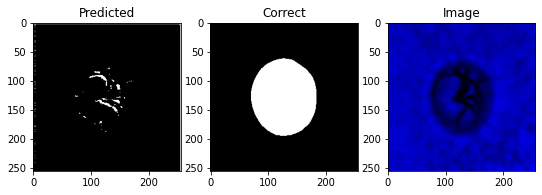

IOU: 0.03780096396803856
Dice: 0.07284819426185137
image #1


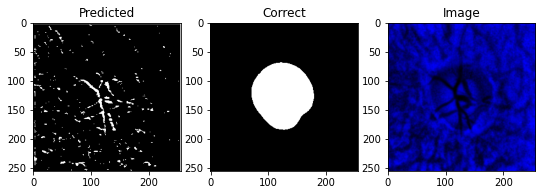

IOU: 0.07828629016876221
Dice: 0.14520501524906812
image #2


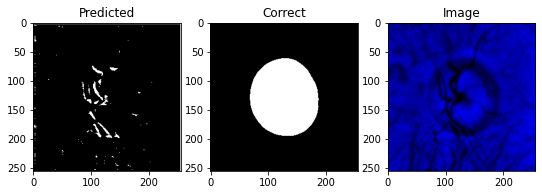

IOU: 0.054163847118616104
Dice: 0.10276172125883108
image #3


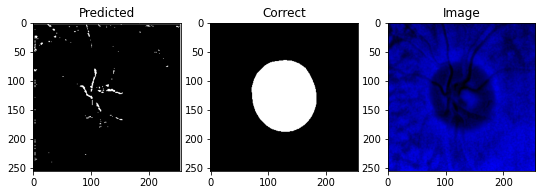

IOU: 0.03468797728419304
Dice: 0.06705012325390304
image #4


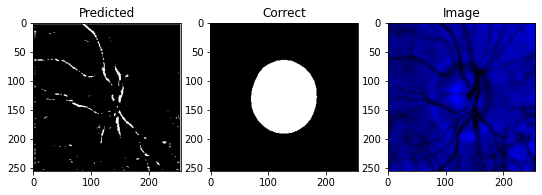

IOU: 0.05317201465368271
Dice: 0.10097498299448265
image #5


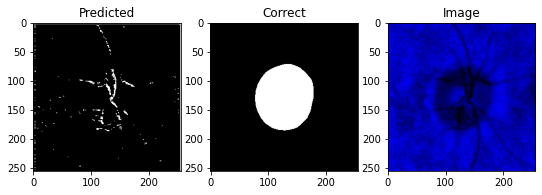

IOU: 0.056225307285785675
Dice: 0.10646460771149051
image #6


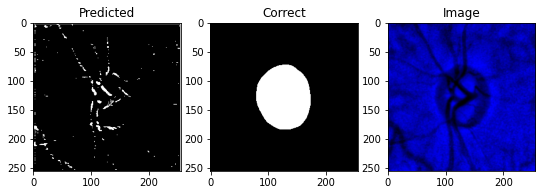

IOU: 0.06680851429700851
Dice: 0.12524930195452733
image #7


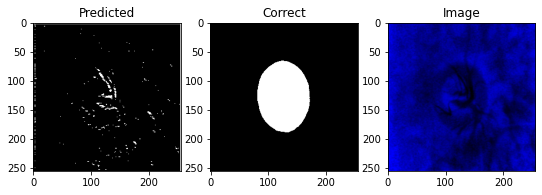

IOU: 0.041923679411411285
Dice: 0.08047361027493478
image #8


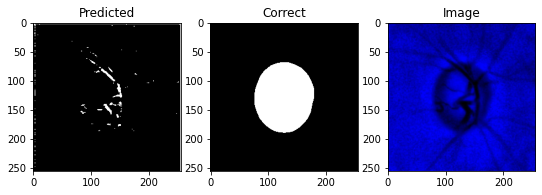

IOU: 0.049696508795022964
Dice: 0.09468738706179979
image #9


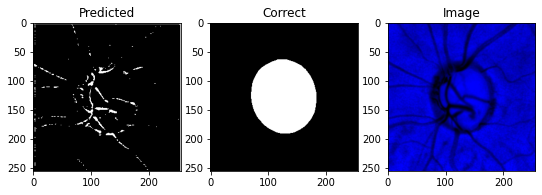

IOU: 0.06842911243438721
Dice: 0.1280929390464695
image #10


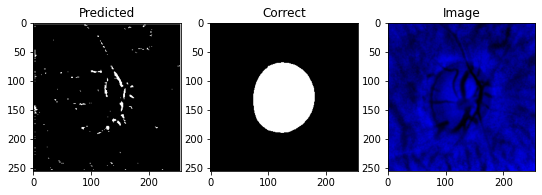

IOU: 0.05125655233860016
Dice: 0.09751483360564107
image #11


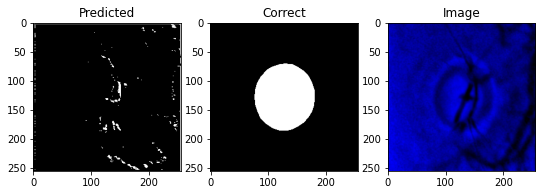

IOU: 0.028843408450484276
Dice: 0.05606957809030348
image #12


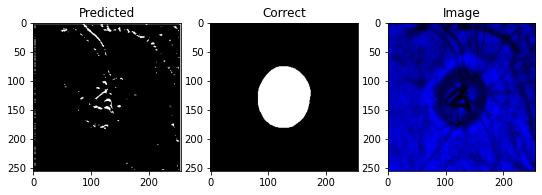

IOU: 0.04238440468907356
Dice: 0.08132202652750598
image #13


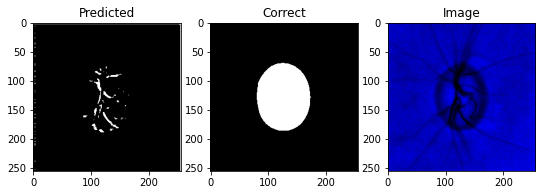

IOU: 0.06343203037977219
Dice: 0.11929681942891983
image #14


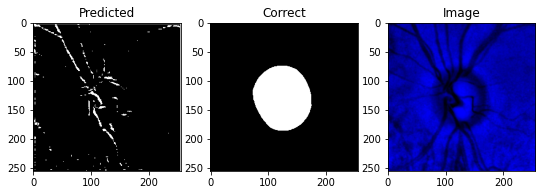

IOU: 0.062437862157821655
Dice: 0.11753696425229272
image #15


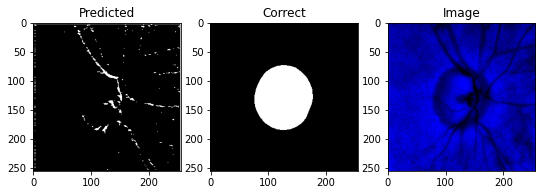

IOU: 0.04764308035373688
Dice: 0.09095288563445418
image #16


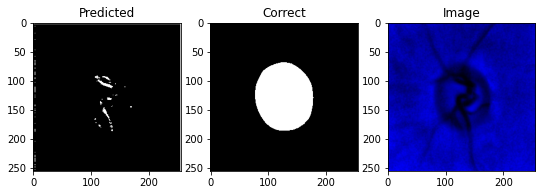

IOU: 0.03457897529006004
Dice: 0.06684646503563861
image #17


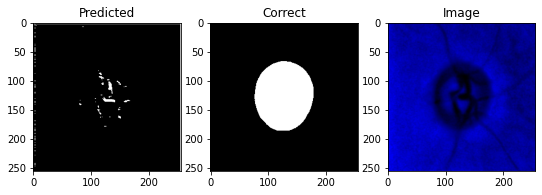

IOU: 0.033460523933172226
Dice: 0.06475433115592161
image #18


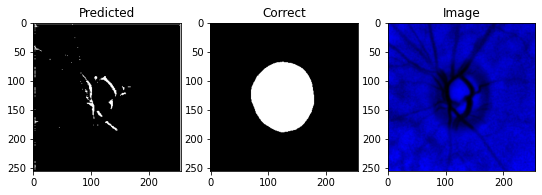

IOU: 0.06110856682062149
Dice: 0.11517872560870317
image #19


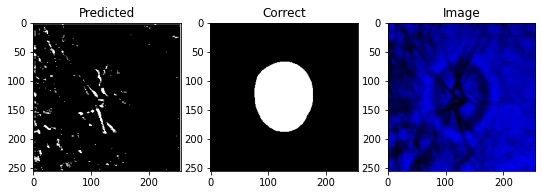

IOU: 0.05262688547372818
Dice: 0.09999152614185239
image #20


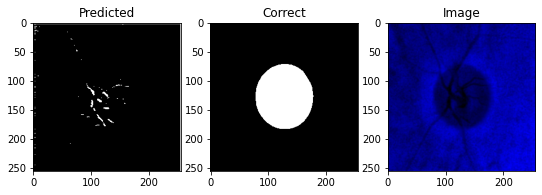

IOU: 0.03320562094449997
Dice: 0.06427688504326329
image #21


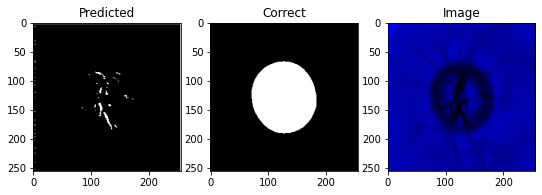

IOU: 0.030274031683802605
Dice: 0.05876889301697205
image #22


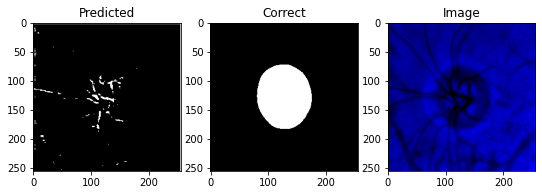

IOU: 0.05883656442165375
Dice: 0.11113436584344914
image #23


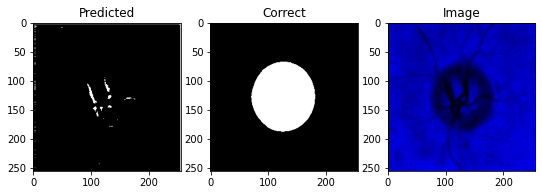

IOU: 0.030687734484672546
Dice: 0.05954807266282676
image #24


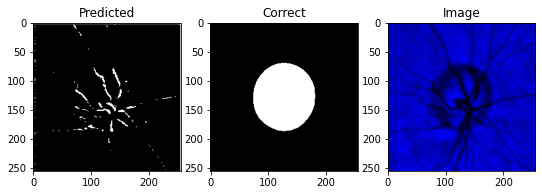

IOU: 0.07424355298280716
Dice: 0.13822481091889072
image #25


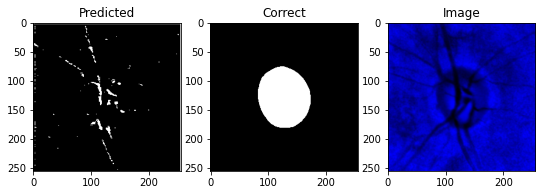

IOU: 0.0564592182636261
Dice: 0.10688385585183532
image #26


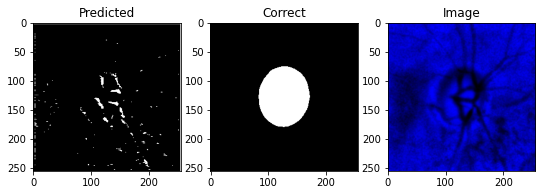

IOU: 0.05886699631810188
Dice: 0.11118864852291231
image #27


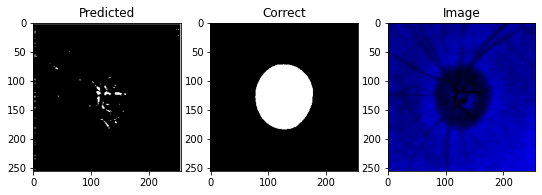

IOU: 0.03408848121762276
Dice: 0.06592952361268989
image #28


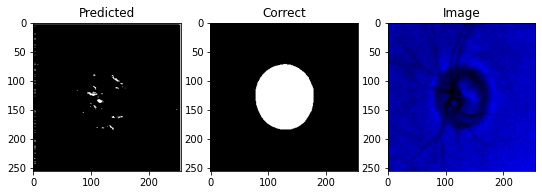

IOU: 0.024723555892705917
Dice: 0.048254097526213985
image #29


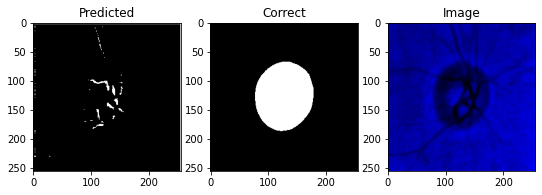

IOU: 0.0442899689078331
Dice: 0.08482312666413085
image #30


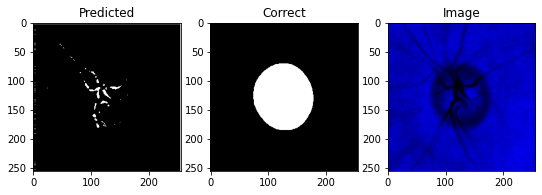

IOU: 0.04707302525639534
Dice: 0.08991354466858789
image #31


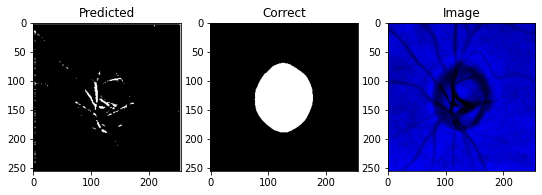

IOU: 0.06765913963317871
Dice: 0.1267429560534667
image #32


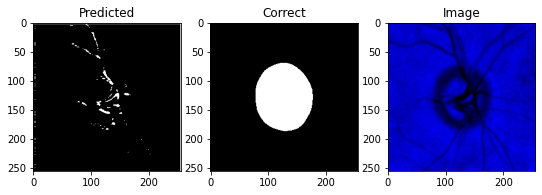

IOU: 0.04840828850865364
Dice: 0.09234625024098708
image #33


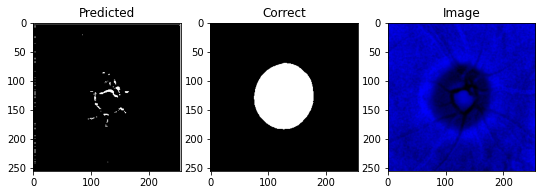

IOU: 0.038631461560726166
Dice: 0.07438915817588287
image #34


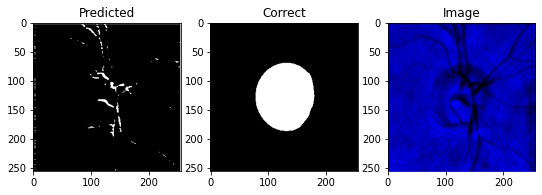

IOU: 0.05254963040351868
Dice: 0.09985207100591716
image #35


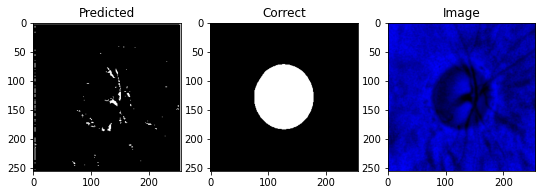

IOU: 0.03742225095629692
Dice: 0.07214468252408099
image #36


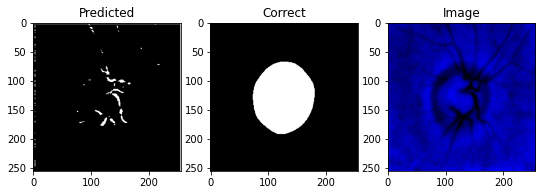

IOU: 0.053520869463682175
Dice: 0.10160381447767663
image #37


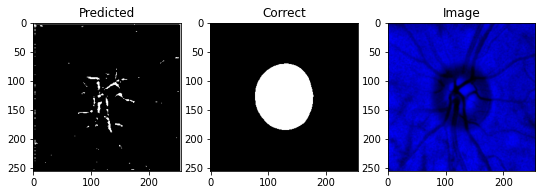

IOU: 0.06956788152456284
Dice: 0.13008595988538682
image #38


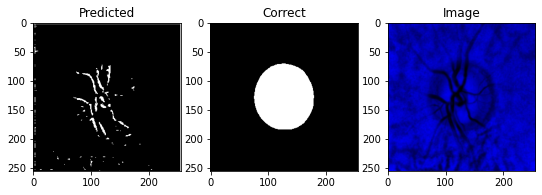

IOU: 0.08622047305107117
Dice: 0.15875317143892714
image #39


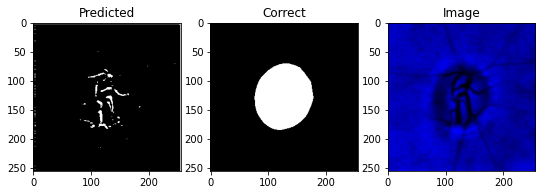

IOU: 0.07344632595777512
Dice: 0.1368421052631579
image #40


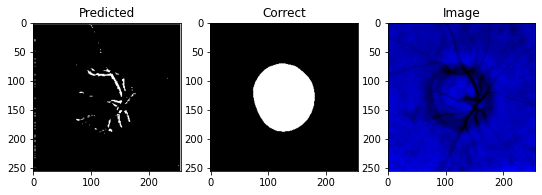

IOU: 0.07157345861196518
Dice: 0.13358572201189833
image #41


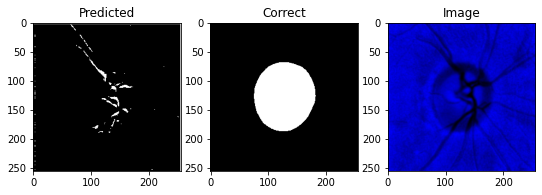

IOU: 0.052170637995004654
Dice: 0.0991676362659984
image #42


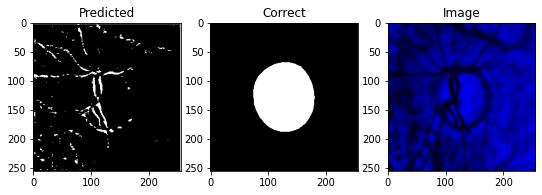

IOU: 0.07851596176624298
Dice: 0.1456
image #43


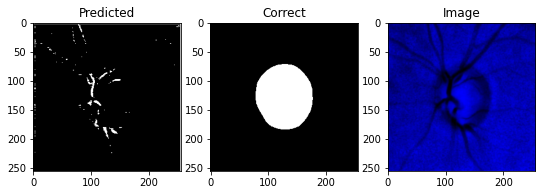

IOU: 0.0473015196621418
Dice: 0.09033028253083963
image #44


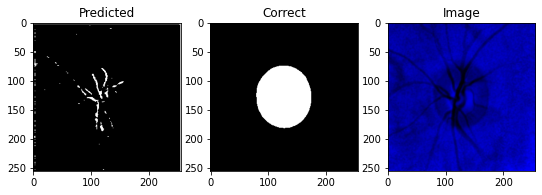

IOU: 0.06423788517713547
Dice: 0.12072091287192066
image #45


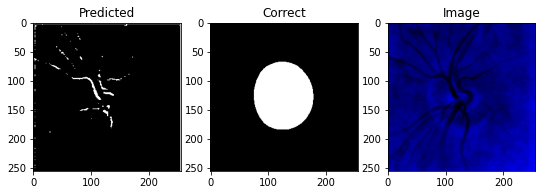

IOU: 0.04985988885164261
Dice: 0.09498389323515877
image #46


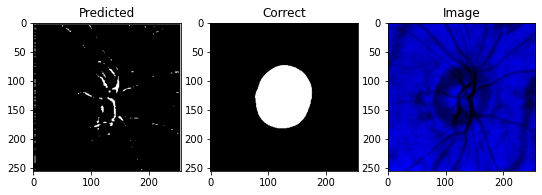

IOU: 0.06560070067644119
Dice: 0.12312435765673176
image #47


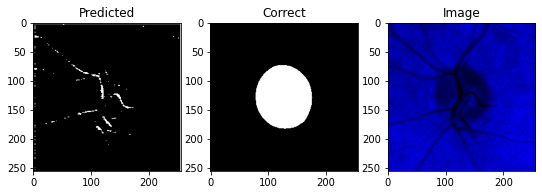

IOU: 0.04232059791684151
Dice: 0.08120456905503634
image #48


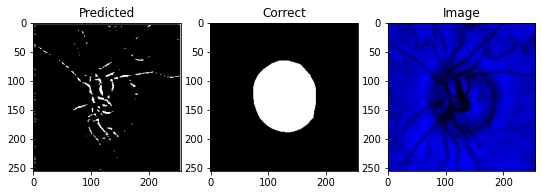

IOU: 0.07169811427593231
Dice: 0.13380281690140844
image #49


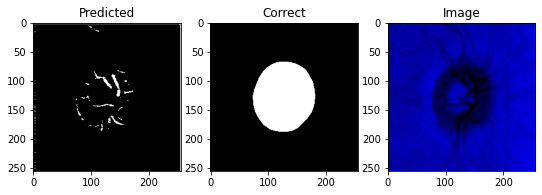

IOU: 0.058530740439891815
Dice: 0.11058864507140369
image #50


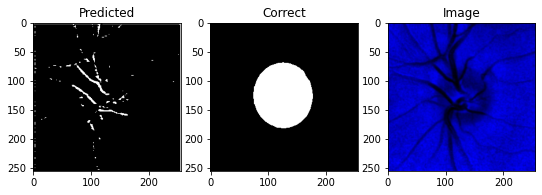

IOU: 0.067303866147995
Dice: 0.12611940298507462


In [13]:
pred_iou, pred_dice, pred_disc = predict(lab_b_channel_test, X_test, Z_test, model, img_size)

In [14]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.05310304
0.100474632755516


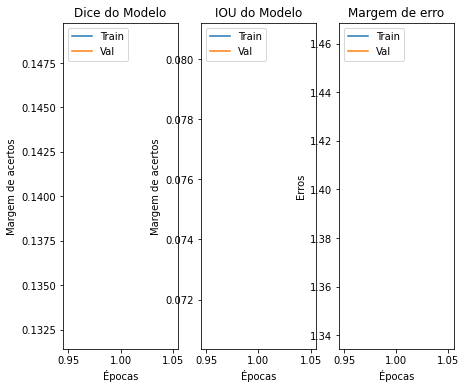

In [15]:
plot_results(history_cup, epochs)

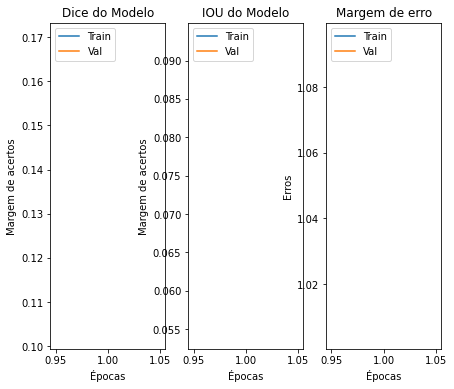

In [16]:
plot_results(history_disc, epochs)

In [17]:
create_table_result(pred_cup, pred_disc, test_idx)

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\imgproc\src\shapedescr.cpp:360: error: (-201:Incorrect size of input array) There should be at least 5 points to fit the ellipse in function 'cv::fitEllipseNoDirect'
